In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [16]:
df=pd.read_csv("mines_classification.csv")

In [17]:
df.head()

,Unnamed: 0,V,H,S,M
0,0,0.338157,0.000000,0.0,1
1,1,0.320241,0.181818,0.0,1
2,2,0.287009,0.272727,0.0,1
3,3,0.256284,0.454545,0.0,1
4,4,0.262840,0.545455,0.0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  338 non-null    int64  
 1   V           338 non-null    float64
 2   H           338 non-null    float64
 3   S           338 non-null    float64
 4   M           338 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 13.3 KB


In [19]:
df.isnull().count

<bound method DataFrame.count of      Unnamed: 0      V      H      S      M
0         False  False  False  False  False
1         False  False  False  False  False
2         False  False  False  False  False
3         False  False  False  False  False
4         False  False  False  False  False
..          ...    ...    ...    ...    ...
333       False  False  False  False  False
334       False  False  False  False  False
335       False  False  False  False  False
336       False  False  False  False  False
337       False  False  False  False  False

[338 rows x 5 columns]>

In [20]:
df.shape

(338, 5)

# dataset was having no missing  values and was already normalized

In [21]:
X=df.drop(columns='M')
y=df['M']

In [22]:
X

,Unnamed: 0,V,H,S
0,0,0.338157,0.000000,0.0
1,1,0.320241,0.181818,0.0
2,2,0.287009,0.272727,0.0
3,3,0.256284,0.454545,0.0
4,4,0.262840,0.545455,0.0
...,...,...,...,...
333,333,0.323262,0.909091,0.4
334,334,0.444108,0.181818,1.0
335,335,0.353474,0.454545,1.0
336,336,0.362537,0.727273,1.0


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
333    5
334    5
335    5
336    5
337    5
Name: M, Length: 338, dtype: int64

# Training on different Classifiers

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [40]:
# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Print the results
    print(f'{name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.4412
Decision Tree Accuracy: 0.9265
SVM Accuracy: 0.8676
k-NN Accuracy: 0.9559
Naive Bayes Accuracy: 0.5735


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Hyper Parameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for Logistic Regression, SVM, and Decision Tree
logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
svm_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
dt_param_grid = {'max_depth': [None, 5, 10, 15, 20]}
knn_param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Initialize classifiers with default parameters
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Apply hyperparameter tuning for Logistic Regression, SVM, and Decision Tree, and k-NN
tuned_classifiers = {}
for name, clf in classifiers.items():
    if name == 'Logistic Regression':
        grid_search = GridSearchCV(clf, logreg_param_grid, cv=5)
    elif name == 'SVM':
        grid_search = GridSearchCV(clf, svm_param_grid, cv=5)
    elif name == 'Decision Tree':
        grid_search = GridSearchCV(clf, dt_param_grid, cv=5)
    elif name == 'k-NN':
        grid_search = GridSearchCV(clf, knn_param_grid, cv=5)
    else:
        # For models without hyperparameter tuning, use the default model
        grid_search = clf
    
    # Fit the model (with or without tuning)
    grid_search.fit(X_train, y_train)
    
    # Save the best model in the tuned_classifiers dictionary if available
    if hasattr(grid_search, 'best_estimator_'):
        tuned_classifiers[name] = grid_search.best_estimator_
    else:
        tuned_classifiers[name] = clf

# Evaluate each tuned classifier
for name, clf in tuned_classifiers.items():
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Print the results
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'Best Hyperparameters: {clf.get_params()}')


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

KeyboardInterrupt: 

# Trying to use cross-validation

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming X and y are your feature and target arrays
# Replace these with your actual dataset
# X, y = ...

# Create a pipeline with feature scaling and SVM
svm_model = make_pipeline(StandardScaler(), SVC(C=100, kernel='rbf', gamma='scale'))

# Perform cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


In [ ]:
best_svm_params = {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None,
                   'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3,
                   'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False,
                   'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

In [ ]:
# Initialize SVM classifier with the best hyperparameters
svm_classifier = SVC(**best_svm_params)
# Train the model
svm_classifier.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)
# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'SVM Accuracy with Best Hyperparameters: {accuracy:.4f}')

# Tried balancing the dataset with imblearn  adn the accuracy changed

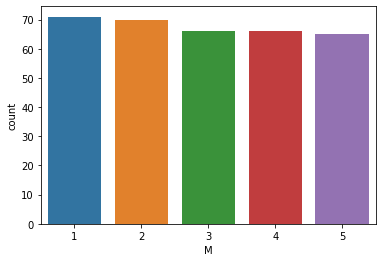

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x='M', data=df)
plt.show()

In [25]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [26]:
resamp = RandomUnderSampler()
balX, baly = resamp.fit_resample(X,y)

In [27]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(balX, baly, test_size=0.2, random_state=42)

In [28]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [29]:
# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X1_train, y1_train)
    
    # Make predictions
    y1_pred = clf.predict(X1_test)
    
    # Calculate accuracy
    accuracy = metrics.accuracy_score(y1_test, y1_pred)
    
    # Print the results
    print(f'{name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.6154
Decision Tree Accuracy: 0.9692
SVM Accuracy: 0.7692
k-NN Accuracy: 0.9692
Naive Bayes Accuracy: 0.5692


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = decision_tree.predict(X1_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y1_test, y1_pred)
precision=metrics.precision_score(y1_test, y1_pred,average='weighted')
f1_score=metrics.f1_score(y1_test, y1_pred,average='weighted')
# Print the result
print(f'Decision Tree Accuracy: {accuracy:.4f}')
print(f'Decision Tree precision: {precision:.4f}')
print(f'Decision Tree f1score: {f1_score:.4f}')


Decision Tree Accuracy: 0.9692
Decision Tree precision: 0.9715
Decision Tree f1score: 0.9693


In [35]:
import pickle

In [36]:
pickle.dump(decision_tree,open('mines_classification.pkl','wb'))

In [37]:
df.to_csv('mines_classification.csv')